In [1]:
%cd /Data/Projects/HaritoProduction/

/Data/Projects/HaritoProduction


/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from backend.app.load_model import load_model1, load_model2
from backend.app.class_activation_maps import ClassActivationMaps
from backend.utils.image import read_images, plot_heatmap

import torch

In [3]:
model1 = load_model1()

New https://pypi.org/project/ultralytics/8.2.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.59 🚀 Python-3.11.9 torch-2.3.1+cu121 CPU (12th Gen Intel Core(TM) i5-12450H)
engine/trainer: task=detect, mode=train, model=/Data/Projects/ThyroidCancer_InfoData_Local/model/best.pt, data=/kaggle/working/datasets/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fals

RuntimeError: Dataset '/kaggle/working/datasets/data.yaml' error ❌ '/kaggle/working/datasets/data.yaml' does not exist

In [8]:
# model1 = load_model1()
model2 = load_model2()
target_layers = model2.feature_extractor[-2]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

H97_EfficientNet(
  (feature_extractor): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (s

In [9]:
cam_create = ClassActivationMaps(model2, target_layers)

In [10]:
images_path = []

image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B5/431_3.jpg'
images_path.append(image_path)
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B5/431_4.jpg'
images_path.append(image_path)

image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/10_2.jpg'
images_path.append(image_path)
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/8_4.jpg'
images_path.append(image_path)
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/7_4.jpg'
images_path.append(image_path)
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/.B2/6_4.jpg'
images_path.append(image_path)

image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/78_3.jpg'
images_path.append(image_path)
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/78_4.jpg'
images_path.append(image_path)
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/test/B6/63_1.jpg'
images_path.append(image_path)
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/630_2.jpg'
images_path.append(image_path)
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/628_0.jpg'
images_path.append(image_path)
image_path = '/Data/Projects/ThyroidCancer_InfoData_Local/dataver3/train/B6/620_0.jpg'
images_path.append(image_path)

images = read_images(images_path)

In [11]:
images.shape

(12, 224, 224, 3)

In [12]:
cam_create.make_cam_images(images)

In [13]:
heatmaps = cam_create.grayscale_cams

In [14]:
images.shape

(12, 224, 224, 3)

In [15]:
heatmaps.shape

(12, 224, 224)

In [16]:
heatmap_images = cam_create.cam_on_images(images, False)

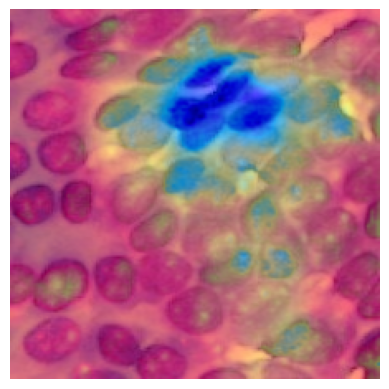

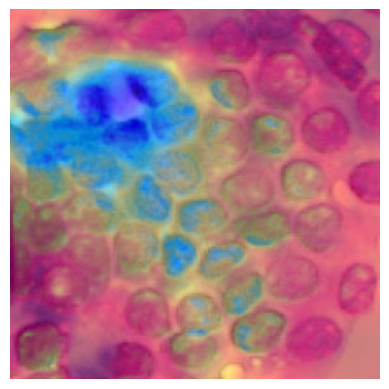

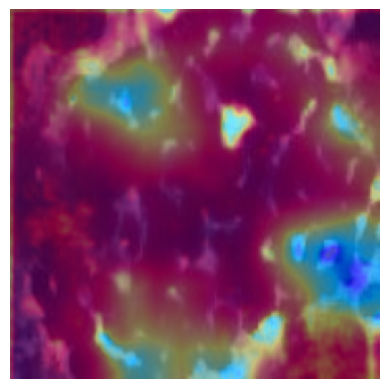

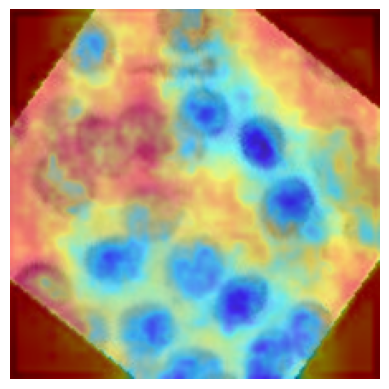

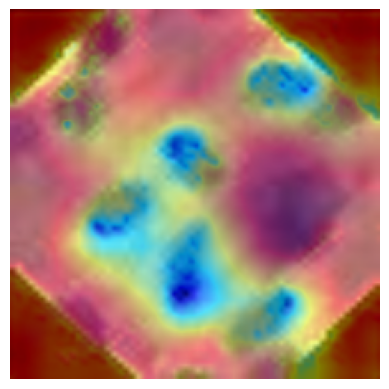

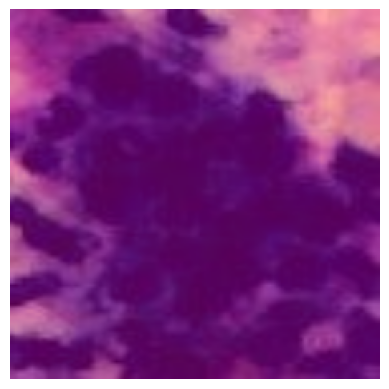

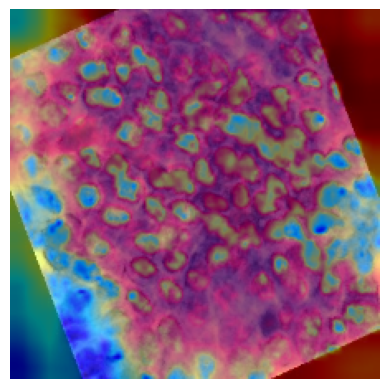

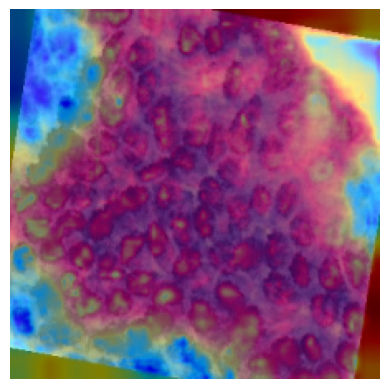

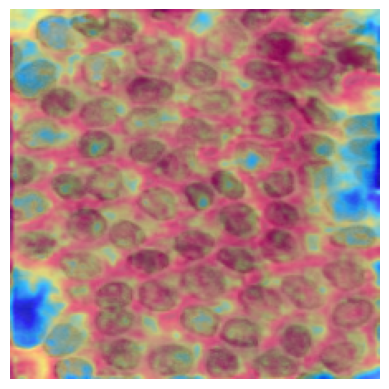

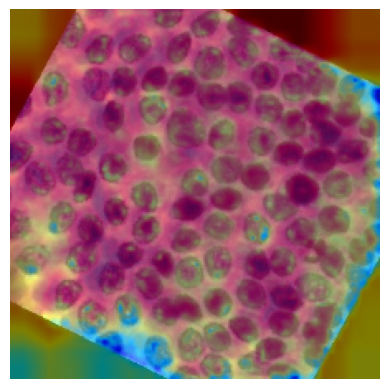

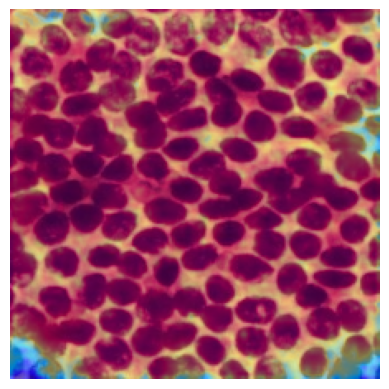

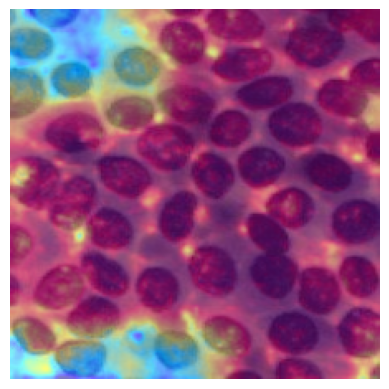

In [17]:
for i in range(len(heatmap_images)):
    plot_heatmap(heatmap_images[i])
# plot_heatmap(heatmap_images[0])

In [18]:
model_outputs = cam_create.cam.outputs

In [19]:
print(model_outputs.shape, model_outputs)

torch.Size([12, 3]) tensor([[-3.0977e+02,  4.8864e+01,  3.4994e+01],
        [-3.4077e+02,  5.3868e+01,  3.8600e+01],
        [ 6.8146e+00,  3.4715e-02, -1.5411e+00],
        [ 4.9050e+00, -1.0042e-01, -1.1573e+00],
        [ 1.1242e+01,  3.4800e-01, -2.4308e+00],
        [-6.2667e+00, -2.2628e-01, -3.7797e-01],
        [-1.7766e+02, -1.6334e+01, -1.0353e+01],
        [-2.1088e+02, -1.9439e+01, -1.2274e+01],
        [-5.4732e+02, -5.0627e+01, -3.1560e+01],
        [-1.6441e+02, -1.5093e+01, -9.5843e+00],
        [-5.0174e+02, -4.6401e+01, -2.8947e+01],
        [-3.2352e+02, -2.9880e+01, -1.8731e+01]], grad_fn=<AddmmBackward0>)


In [20]:
max_indices = torch.argmax(model_outputs, dim=1)

print(max_indices)

tensor([1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2])
